# 빌릴 땐 마음대로지만 반납할 땐 아니란다
by Sean Park, 20-04-16  
[블로그]()  
[Github](https://github.com/Sean-Parkk)
> *성수동에는 따릉이가 정말 많다.*  
카페 거리, 서울숲 산책, 한강 자전거길 등 주변에 자전거로 즐길 콘텐츠가 많아서 일 것이다.  
반면, 성수동에서 따릉이를 타고 본가인 쌍문동까지 가면, 따릉이를 반납할 곳이 참 없다고 느꼈었다.  
**지역마다 따릉이 분포가 어떤지** 살펴보고, **어느 구역에 확충하면 좋을 지** 살펴보자.

* 목적: 서울 지역 따릉이 분포 분석하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-가져오기" data-toc-modified-id="1.-데이터-가져오기-1">1. 데이터 가져오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2-1.-데이터-병합" data-toc-modified-id="2-1.-데이터-병합-2.1">2-1. 데이터 병합</a></span></li><li><span><a href="#2-2.-결측값-처리" data-toc-modified-id="2-2.-결측값-처리-2.2">2-2. 결측값 처리</a></span></li><li><span><a href="#2-3.-station컬럼-처리,-id컬럼-추가" data-toc-modified-id="2-3.-station컬럼-처리,-id컬럼-추가-2.3">2-3. station컬럼 처리, id컬럼 추가</a></span></li><li><span><a href="#2-4.-컬럼-형식-변경" data-toc-modified-id="2-4.-컬럼-형식-변경-2.4">2-4. 컬럼 형식 변경</a></span><ul class="toc-item"><li><span><a href="#2-4-1.-df_rent,-df_return" data-toc-modified-id="2-4-1.-df_rent,-df_return-2.4.1">2-4-1. df_rent, df_return</a></span></li><li><span><a href="#2-4-2.-df_station" data-toc-modified-id="2-4-2.-df_station-2.4.2">2-4-2. df_station</a></span></li><li><span><a href="#2-4-3.-컬럼-순서-변경" data-toc-modified-id="2-4-3.-컬럼-순서-변경-2.4.3">2-4-3. 컬럼 순서 변경</a></span></li></ul></li></ul></li><li><span><a href="#3.-데이터-분석" data-toc-modified-id="3.-데이터-분석-3">3. 데이터 분석</a></span><ul class="toc-item"><li><span><a href="#3-1.-따릉이가-많이-배치된-지역-찾기" data-toc-modified-id="3-1.-따릉이가-많이-배치된-지역-찾기-3.1">3-1. 따릉이가 많이 배치된 지역 찾기</a></span><ul class="toc-item"><li><span><a href="#3-1-1.-가장-따릉이가-많이-배치된-대여소는?" data-toc-modified-id="3-1-1.-가장-따릉이가-많이-배치된-대여소는?-3.1.1">3-1-1. 가장 따릉이가 많이 배치된 대여소는?</a></span></li><li><span><a href="#3-1-2.-성동구-내-따릉이-분포-확인해보기" data-toc-modified-id="3-1-2.-성동구-내-따릉이-분포-확인해보기-3.1.2">3-1-2. 성동구 내 따릉이 분포 확인해보기</a></span></li></ul></li><li><span><a href="#3-2.-따릉이를-많이-대여하는-지역-찾기" data-toc-modified-id="3-2.-따릉이를-많이-대여하는-지역-찾기-3.2">3-2. 따릉이를 많이 대여하는 지역 찾기</a></span></li></ul></li></ul></div>

## 1. 데이터 가져오기
* 대여소 정보: [링크](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)
    * 19.12.09 기준 데이터를 사용
* 이용 정보: [링크](https://data.seoul.go.kr/dataList/OA-15249/F/1/datasetView.do)
    * 18.12~19.11 간 데이터를 사용 (두 개의 파일 사용)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import folium
import googlemaps
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', size=14)
plt.rc('font', family='NanumGothic')

In [3]:
# 파일 불러오기
df_rent1 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201906_201911.xlsx', sheet_name='대여')
df_rent2 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201812_201905.xlsx', sheet_name='대여')
df_return1 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201906_201911.xlsx', sheet_name='반납')
df_return2 = pd.read_excel('source/Seoulbike/공공자전거 대여소별 이용정보_201812_201905.xlsx', sheet_name='반납')
df_station = pd.read_excel('source/Seoulbike/서울특별시 공공자전거 대여소 정보(19.12.9).xlsx')

In [4]:
df_rent1.head(3)

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,강남구,2301. 현대고등학교 건너편,201906,3909
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2432
2,강남구,2303. 논현역 7번출구,201906,1567


In [5]:
df_rent1.tail(3)

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
9269,중랑구,1457. 동원사거리,201911,577
9270,중랑구,1458. 상봉터미널2,201911,1243
9271,중랑구,1459. 용마한신아파트사거리,201911,339


In [6]:
df_rent2.head(3)

,구분,대여소명,대여일자,대여건수
0,강남구,2301. 현대고등학교 건너편,201812.0,364.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,500.0
2,강남구,2303. 논현역 7번출구,201812.0,286.0


In [7]:
df_rent2.tail(3)

,구분,대여소명,대여일자,대여건수
9186,중랑구,1457. 동원사거리,201905.0,827.0
9187,중랑구,1458. 상봉터미널2,201905.0,1421.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,447.0


In [8]:
df_return1.head(3)

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,201906,4072
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2382
2,강남구,2303. 논현역 7번출구,201906,1402


In [9]:
df_return1.tail(3)

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
9270,중랑구,1457. 동원사거리,201911,572
9271,중랑구,1458. 상봉터미널2,201911,1305
9272,중랑구,1459. 용마한신아파트사거리,201911,316


In [10]:
df_return2.head(3)

,구분,대여소명,반납일자,반납건수
0,강남구,2301. 현대고등학교 건너편,201812.0,437.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,556.0
2,강남구,2303. 논현역 7번출구,201812.0,273.0


In [11]:
df_return2.tail(3)

,구분,대여소명,반납일자,반납건수
9186,중랑구,1457. 동원사거리,201905.0,749.0
9187,중랑구,1458. 상봉터미널2,201905.0,1492.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,320.0


In [12]:
df_station.head(3)

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14


In [13]:
df_station.tail(3)

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
1538,종로구,465.0,465. 삼청공원 앞,서울특별시 종로구 삼청동 25-32,37.587605,126.983597,2019.11.20,5
1539,종로구,664.0,서울시립대 대학본부,동대문구 서울시립대로 163 서울시립대학교,37.584129,127.057938,2019.11.20,10
1540,합계,NaN,1540,NaN,NaN,NaN,NaN,19545


* station 마지막 레코드인 합계를 지워주자.

In [14]:
df_station.drop(1540, axis=0, inplace=True)

## 2. 데이터 전처리

### 2-1. 데이터 병합

* 서로 컬럼명이 다름, 병합을 위해 컬럼명을 맞춰줘야함
* 코딩 편의를 위해 컬럼명 영어로 통일하기!
    * 한글명은 한영키를 한 번 더 눌러줘야해서 오타 확률이 더 높은듯

In [15]:
# 데이터 형태 출력
print(df_rent1.shape,'\n',df_rent2.shape)

(9272, 4) 
 (9189, 4)


In [16]:
# 컬럼명 변경, 데이터 합치기
df_rent1.columns=['district','station','date','count']
df_rent2.columns=['district','station','date','count']
df_rent = pd.concat([df_rent1, df_rent2])
print(df_rent.shape)
df_rent.head()

(18461, 4)


,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,559.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,730.0


* 이번엔 반납 데이터를 확인해보자!

In [17]:
df_return1.head()

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,201906,4072
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906,2382
2,강남구,2303. 논현역 7번출구,201906,1402
3,강남구,2304. 신영 ROYAL PALACE 앞,201906,207
4,강남구,2305. MCM 본사 직영점 앞,201906,905


In [18]:
df_return2.head()

,구분,대여소명,반납일자,반납건수
0,강남구,2301. 현대고등학교 건너편,201812.0,437.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812.0,556.0
2,강남구,2303. 논현역 7번출구,201812.0,273.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201812.0,62.0
4,강남구,2305. MCM 본사 직영점 앞,201812.0,218.0


In [19]:
# 컬럼명 통일, 데이터 합치기
df_return1.columns = ['district', 'station', 'date', 'count']
df_return2.columns = ['district', 'station', 'date', 'count']

df_return = pd.concat([df_return1, df_return2])

In [20]:
# 제대로 합쳐졌는지 확인하기!
print(df_return1.shape, df_return2.shape)
print('총 레코드 수: {}'.format(df_return1.shape[0] + df_return2.shape[0]))
print(df_return.shape)
df_return

(9273, 4) (9189, 4)
총 레코드 수: 18462
(18462, 4)


,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,4072.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2382.0
2,강남구,2303. 논현역 7번출구,201906.0,1402.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201906.0,207.0
4,강남구,2305. MCM 본사 직영점 앞,201906.0,905.0
...,...,...,...,...
9184,중랑구,1455. 상봉역 2번 출구,201905.0,1300.0
9185,중랑구,1456. 상아빌딩(우림시장 교차로),201905.0,867.0
9186,중랑구,1457. 동원사거리,201905.0,749.0
9187,중랑구,1458. 상봉터미널2,201905.0,1492.0


### 2-2. 결측값 처리
* Null값이 있는지 확인해보자.

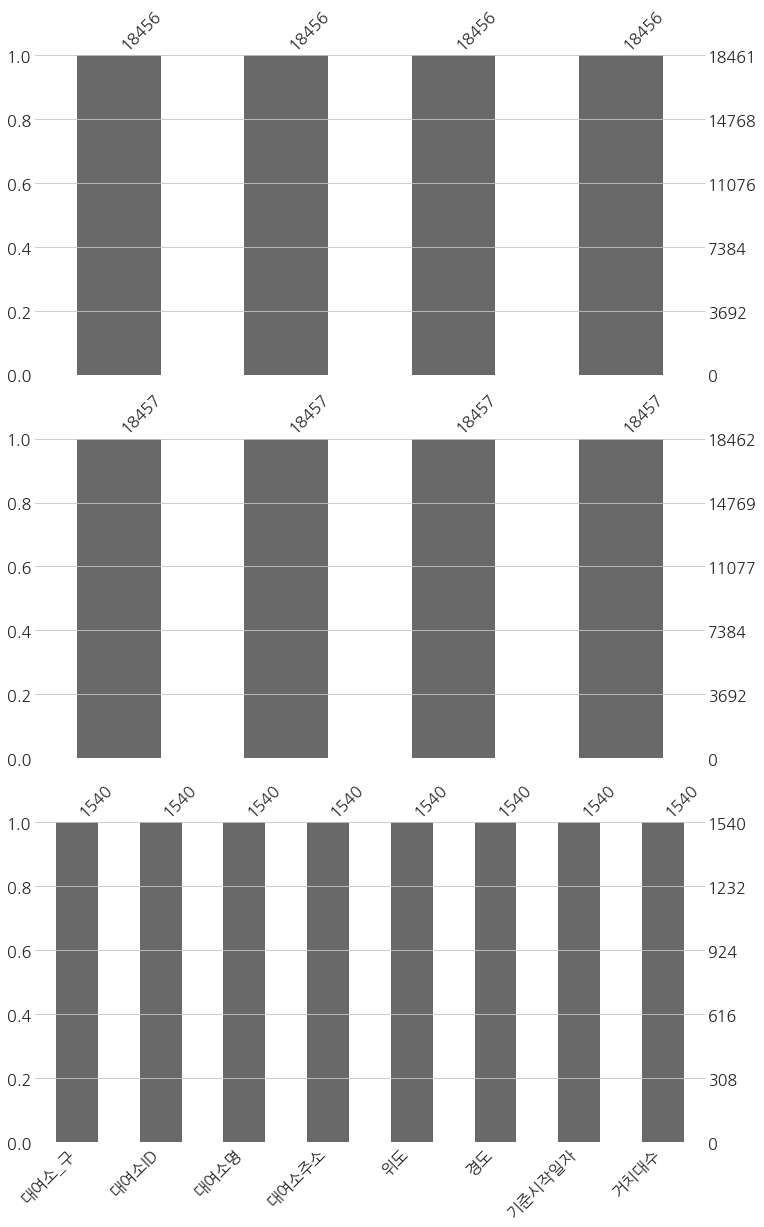

In [21]:
import missingno as msno
f, ax = plt.subplots(3, 1, figsize=(12, 20))
msno.bar(df_rent, ax=ax[0])
msno.bar(df_return, ax=ax[1])
msno.bar(df_station, ax=ax[2])

In [22]:
df_return[df_return['count'].isnull()]

,district,station,date,count
1523,NaN,NaN,NaN,NaN
3052,NaN,NaN,NaN,NaN
4579,NaN,NaN,NaN,NaN
6116,NaN,NaN,NaN,NaN
7652,NaN,NaN,NaN,NaN


In [23]:
df_rent[df_rent['count'].isnull()]

,district,station,date,count
1523,NaN,NaN,NaN,NaN
3052,NaN,NaN,NaN,NaN
4579,NaN,NaN,NaN,NaN
6116,NaN,NaN,NaN,NaN
7652,NaN,NaN,NaN,NaN


* 모든 컬럼이 null값인 레코드들이다. 삭제해주자

In [24]:
df_return.dropna(inplace=True)
df_rent.dropna(inplace=True)

In [25]:
df_rent.tail()

,district,station,date,count
9184,중랑구,1455. 상봉역 2번 출구,201905.0,1362.0
9185,중랑구,1456. 상아빌딩(우림시장 교차로),201905.0,826.0
9186,중랑구,1457. 동원사거리,201905.0,827.0
9187,중랑구,1458. 상봉터미널2,201905.0,1421.0
9188,중랑구,1459. 용마한신아파트사거리,201905.0,447.0


* 그런데, index가 중복되어있다. 인덱스를 다시 설정해주자.

In [26]:
df_return.reset_index(drop=True, inplace=True)
df_rent.reset_index(drop=True, inplace=True)

In [27]:
df_station.head()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


In [28]:
# 컬럼명 영어로 변경!
df_station.columns = ['district', 'id', 'station',
                      'address', 'lat', 'lng', 'date', 'count']

### 2-3. station컬럼 처리, id컬럼 추가

In [29]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18456 entries, 0 to 18455
Data columns (total 4 columns):
district    18456 non-null object
station     18456 non-null object
date        18456 non-null float64
count       18456 non-null float64
dtypes: float64(2), object(2)
memory usage: 576.9+ KB


In [30]:
df_rent.head(3)

,district,station,date,count
0,강남구,2301. 현대고등학교 건너편,201906.0,3909.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201906.0,2432.0
2,강남구,2303. 논현역 7번출구,201906.0,1567.0


* 대여소 이름을 보면, [id. 대여소명]으로 되어있다.
* 이것을 [id], [대여소명]으로 변경하면, 나중에 station 데이터의 id컬럼과 연결 시 편리할 것으로 보인다

In [31]:
df_rent[1380:1400]

,district,station,date,count
1380,정비센터,9998. 영남주차장 정비센터,201906.0,5.0
1381,정비센터,상암센터 정비실,201906.0,2.0
1382,정비센터,중랑센터,201906.0,36.0
1383,종로구,301. 경복궁역 7번출구 앞,201906.0,1312.0
1384,종로구,302. 경복궁역 4번출구 뒤,201906.0,2446.0
1385,종로구,303. 광화문역 1번출구 앞,201906.0,1386.0
1386,종로구,304. 광화문역 2번출구 앞,201906.0,1010.0
1387,종로구,305. 종로구청 옆,201906.0,2018.0
1388,종로구,306. 광화문역 7번출구 앞,201906.0,1159.0
1389,종로구,307. 서울역사박물관 앞,201906.0,1335.0


In [32]:
import re
from tqdm import tqdm_notebook
p1 = re.compile('\d+')
p2 = re.compile('\d+[. ]')
error_row = []
for row in tqdm_notebook(df_rent.index):
    try:
        m = p1.match(df_rent.loc[row, 'station'])
        df_rent.loc[row, 'id'] = m.group()
    except:
        df_rent.loc[row, 'id'] = 'None'
        error_row.append(row)    # 에러행 저장해놓기
    try:
        df_rent.loc[row, 'station'] = p2.sub('', df_rent.loc[row, 'station'])
    except:
        error_row.append(row)    # 에러행 저장해놓기

In [33]:
error_row

[1381,
 1382,
 1543,
 1544,
 2926,
 2927,
 3088,
 4466,
 4467,
 4468,
 4631,
 6013,
 6014,
 6015,
 6178,
 6179,
 7563,
 7564,
 7725,
 9109,
 9110]

In [34]:
df_rent.loc[error_row,:].station.unique

<bound method Series.unique of 1381    상암센터 정비실
1382        중랑센터
1543     대여소명 없음
1544     대여소명 없음
2926    상암센터 정비실
2927        중랑센터
3088     대여소명 없음
4466    상암센터 정비실
4467      시스템관리팀
4468        중랑센터
4631     대여소명 없음
6013    상암센터 정비실
6014      시스템관리팀
6015        중랑센터
6178     대여소명 없음
6179     대여소명 없음
7563    상암센터 정비실
7564        중랑센터
7725     대여소명 없음
9109    상암센터 정비실
9110        중랑센터
Name: station, dtype: object>

* 정비센터이거나, 그룹명이 없는 경우가 있다. 

In [35]:
p1 = re.compile('\d+')
p2 = re.compile('\d+[. ]')
error_row_return = []
for row in tqdm_notebook(df_return.index):
    try:
        m = p1.match(df_return.loc[row, 'station'])
        df_return.loc[row, 'id'] = m.group()
    except:
        df_return.loc[row, 'id'] = 'None'
        error_row_return.append(row)    # 에러행 저장해놓기
    try:
        df_return.loc[row, 'station'] = p2.sub('', df_return.loc[row, 'station'])
    except:
        error_row_return.append(row)    # 에러행 저장해놓기

In [36]:
len(error_row_return)

22

In [37]:
df_return.loc[error_row_return]

,district,station,date,count,id
1381,정비센터,상암센터 정비실,201906.0,9.0,None
1382,정비센터,중랑센터,201906.0,24.0,None
1543,그룹명 없음,대여소명 없음,201906.0,12644.0,None
1544,그룹명 없음,대여소명 없음,201907.0,1.0,None
1545,그룹명 없음,대여소명 없음,201907.0,12537.0,None
2927,정비센터,상암센터 정비실,201907.0,11.0,None
2928,정비센터,중랑센터,201907.0,34.0,None
3089,그룹명 없음,대여소명 없음,201908.0,12188.0,None
4467,정비센터,상암센터 정비실,201908.0,13.0,None
4468,정비센터,시스템관리팀,201908.0,2.0,None


* return데이터에도 역시 정비소거나 그룹명이 없는 경우가 존재한다.
    * 근데센터에서 분출된 자전거는 정말 정비가 되어서 나온 것은 아닐까?
* 정비센터는 count 수 자체가 적고, 대여소명이 없는 곳은 추적할 방법이 없기때문에, **삭제하도록 하자.**
    * 대여소명이 없는 곳은 대여소가 사라진곳이려나?

In [38]:
df_rent.drop(error_row, inplace=True)
df_rent.reset_index(drop=True, inplace=True)

df_return.drop(error_row_return, inplace=True)
df_return.reset_index(drop=True, inplace=True)

In [39]:
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


* 이제 station데이터 내 대여소명 내 id를 빼주자.

In [40]:
p = re.compile('\d+[. ]')
for row in df_station.index:
    try:
        df_station.loc[row, 'station'] = p2.sub('', df_station.loc[row, 'station'])
    except:
        print(row)

In [41]:
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101.0,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102.0,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103.0,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104.0,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105.0,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


### 2-4. 컬럼 형식 변경

#### 2-4-1. df_rent, df_return

In [42]:
df_rent.info()
print('- - - - - -')
df_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18435 entries, 0 to 18434
Data columns (total 5 columns):
district    18435 non-null object
station     18435 non-null object
date        18435 non-null float64
count       18435 non-null float64
id          18435 non-null object
dtypes: float64(2), object(3)
memory usage: 720.2+ KB
- - - - - -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18435 entries, 0 to 18434
Data columns (total 5 columns):
district    18435 non-null object
station     18435 non-null object
date        18435 non-null float64
count       18435 non-null float64
id          18435 non-null object
dtypes: float64(2), object(3)
memory usage: 720.2+ KB


* date
    * datetime형식으로 변경
* count, id
    * int로 변경

In [83]:
for df in tqdm_notebook([df_rent, df_return]):
    df['date'] = df['date'] * 100 + 1    # date 내 월까지만 기재되있으므로 이를 모두 1일로 통일
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df['count'] = df['count'].astype('int')
    df['id'] = df['id'].astype('int')

In [84]:
df_rent.info()
print('- - - - - -')
df_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18435 entries, 0 to 18434
Data columns (total 5 columns):
district    18435 non-null object
station     18435 non-null object
date        18435 non-null datetime64[ns]
count       18435 non-null int32
id          18435 non-null int32
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 576.2+ KB
- - - - - -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18435 entries, 0 to 18434
Data columns (total 5 columns):
district    18435 non-null object
station     18435 non-null object
date        18435 non-null datetime64[ns]
count       18435 non-null int32
id          18435 non-null int32
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 576.2+ KB


In [87]:
df_rent.head()

,district,station,date,count,id
0,강남구,현대고등학교 건너편,2019-06-01,3909,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2432,2302
2,강남구,논현역 7번출구,2019-06-01,1567,2303
3,강남구,신영 ROYAL PALACE 앞,2019-06-01,559,2304
4,강남구,MCM 본사 직영점 앞,2019-06-01,730,2305


In [86]:
df_return.head()

,district,station,date,count,id
0,강남구,현대고등학교 건너편,2019-06-01,4072,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2382,2302
2,강남구,논현역 7번출구,2019-06-01,1402,2303
3,강남구,신영 ROYAL PALACE 앞,2019-06-01,207,2304
4,강남구,MCM 본사 직영점 앞,2019-06-01,905,2305


#### 2-4-2. df_station

In [89]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 1539
Data columns (total 8 columns):
district    1540 non-null object
id          1540 non-null float64
station     1540 non-null object
address     1540 non-null object
lat         1540 non-null float64
lng         1540 non-null float64
date        1540 non-null object
count       1540 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 148.3+ KB


* id
    * int로 변환
* date
    * datetime으로 변환

In [90]:
df_station['id'] = df_station['id'].astype('int')
df_station['date'] = pd.to_datetime(df_station['date'])
df_station

ValueError: ('Unknown string format:', '2018.7.4개통')

* 오류가 나서 살펴보니, date컬럼에 문자가 섞여있는 데이터가 있나보다.

In [111]:
# 개통이라는 단어가 포함되어있으면, 그 단어를 제외하여 저장
for row in df_station.index:
    try:
        if df_station.loc[row, 'date'][-2:] == '개통': 
            df_station.loc[row, 'date'] = df_station.loc[row, 'date'][:-2]
    except:
        pass

In [115]:
df_station['date'] = pd.to_datetime(df_station['date'])
df_station.head()

,district,id,station,address,lat,lng,date,count
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40:56,5
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42:06,20
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43:13,14
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44:31,13
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45:30,5


* 잘 처리가 되었다.

#### 2-4-3. 컬럼 순서 변경

In [119]:
df_return.head(3)

,district,station,date,count,id
0,강남구,현대고등학교 건너편,2019-06-01,4072,2301
1,강남구,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2382,2302
2,강남구,논현역 7번출구,2019-06-01,1402,2303


In [127]:
df_rent = df_rent[['district', 'id', 'station', 'date', 'count']]
df_return = df_return[['district', 'id', 'station', 'date', 'count']]

In [129]:
df_rent.head(2)

,district,id,station,date,count
0,강남구,2301,현대고등학교 건너편,2019-06-01,3909
1,강남구,2302,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2432


In [130]:
df_return.head(2)

,district,id,station,date,count
0,강남구,2301,현대고등학교 건너편,2019-06-01,4072
1,강남구,2302,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2382


## 3. 데이터 분석
* 어느 지역에 자전거가 많이 배치되어있는지부터 확인해보자.

### 3-1. 따릉이가 많이 배치된 지역 찾기
* 어느 지역에 따릉이가 많을까?
* 서울 중심부에 비교적 많이 배치되어있지 않을까? (정말 서울스러운 생각..)

#### 3-1-1. 가장 따릉이가 많이 배치된 대여소는?
* 먼저, 자전거 배치 수를 살펴보자.

40      5
39      1
35      3
30     12
27      1
26      2
25      8
23      1
22      1
21      3
20    199
19      6
18      6
17      5
16      9
15    283
14     14
13     28
12     47
11     11
10    714
9      37
8      87
7      37
6       5
5      15
Name: count, dtype: int64


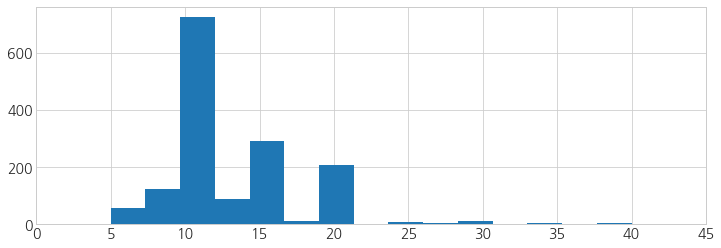

In [193]:
print(df_station['count'].value_counts().sort_index(ascending=False))
plt.figure(figsize=(12, 4))
plt.hist(df_station['count'], bins=15)
plt.xlim(0, 45)
plt.show()

* 가장 많이 배치된 곳은 무려 40대나 배치되어있다.
    * 40대면 도로 전체에 자전거가 깔려있는건가... 아직 본 적이 없어서 궁금하다.
    * 아마 한강 근처나 자전거도로가 잘 되어있는 곳이 아닐까?
* 10대가 배치된 곳이 가장 많고, 다음으로는 15대, 20대가 많다.
* 가장 적은곳은 5대가 배치되어있다.
* **35대 이상 배치된 곳은 어디인지 살펴보자.**

In [199]:
mt35_station = df_station[df_station['count']>=35].sort_values('count', ascending=False).reset_index(drop=True)
mt35_station

,district,id,station,address,lat,lng,date,count
0,마포구,186,월드컵공원,서울특별시 마포구 하늘공원로 108-1,37.563965,126.898209,2016-07-06 12:00:00,40
1,영등포구,207,여의나루역 1번출구 앞,서울특별시 영등포구 여의동로 지하343,37.526989,126.932098,2015-09-17 15:33:18,40
2,마포구,420,서울시 공공자전거 상암센터,서울특별시 마포구 월드컵북로47길 10,37.566246,126.896179,2015-10-07 11:39:12,40
3,광진구,574,아차산역4번출구,서울특별시 광진구 능동로 216,37.551849,127.088982,2016-07-06 12:00:00,40
4,용산구,829,베르가모앞,서울특별시 용산구 한강대로 23,37.522930,126.961693,2017-11-28 11:57:57,40
5,광진구,3507,어린이회관,서울특별시 광진구 능동 465-7,37.545952,127.078003,2017-11-01 16:00:00,39
6,영등포구,206,KBS 앞,서울특별시 영등포구 여의공원로 13,37.524666,126.918022,2015-09-17 15:09:17,35
7,영등포구,212,여의도역 1번출구 옆,서울특별시 영등포구 의사당대로 88,37.521362,126.923462,2015-09-17 15:12:54,35
8,중구,311,서울광장 옆,서울특별시 중구 세종대로 지하 101,37.566612,126.977470,2015-10-07 12:11:56,35


* 마포구, 영등포구, 광진구 등 한강 근처이거나 자전거도로가 있는 지역이 많다.
* 근데 이렇게 텍스트로만 보니, 어디에 있는지 감이 잘 오지는 않는다.
* 지도에 나타내서 살펴보자.

In [206]:
import folium

map = folium.Map([mt35_station.lat.median(), mt35_station.lng.median()], zoom_start=13)
for row in mt35_station.index:
    folium.Marker([mt35_station.loc[row, 'lat'], mt35_station.loc[row, 'lng']]).add_to(map)
map

* 예상대로, 따릉이가 많이 배치된 지역은 대부분 한강 근처에 분포되어있는 것을 알 수 있다.
* 다음으로는, **어느 구에** 따릉이가 많이 배치되어있는지 살펴보자.

In [235]:
district_count = df_station.groupby('district').sum()
district_count.head()

,id,lat,lng,count
district,,,,
강남구,233051,3712.498423,12578.440221,1218
강동구,61258,2140.213577,7247.300705,763
강북구,59525,1467.706114,4953.973380,451
강서구,101004,3192.395109,10781.119844,1002
관악구,109301,1911.471931,6473.794822,640


In [215]:
import json
geo_data = json.load(open('source/Seoul_district_geo.json', encoding='utf-8'))

In [242]:
map = folium.Map([df_station['lat'].median(),
                  df_station['lng'].median()], zoom_start=11)

map.choropleth(geo_data=geo_data,
               data=district_count['count'],
               columns=[district_count.index, district_count['count']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

* **강남 3구(강남구, 서초구, 송파구)와 영등포구가 가장 따릉이가 많이 배치되어있다.**
* 반면 **강북은 전반적으로 따릉이 수가 적은 것을 확인할 수 있다.**
    * 그나마 제일 많은 곳은 마포구다.
* 놀랐던 것은, 내가 살고있는 **성동구도 상대적으로 따릉이가 많은 편은 아니었다!**
    * 서울숲 근처에 따릉이가 많아서 가시적으로는 굉장히 많아보였는데, 아마 서울숲 근처에만 많나보다.
    * 음.. 이렇게 끝내면 카더라니까, 실제로 **성동구에는 서울숲 근처에만 따릉이가 많은지 확인해보자!**

#### 3-1-2. 성동구 내 따릉이 분포 확인해보기
* 정말 서울숲에만 많아서 많아보인건가?
* 나는 정녕 우물 안 개구리 혹은 서울숲 안 사슴이었던것인가

In [276]:
seongdong = df_station[df_station['district']=='성동구']
seongdong.reset_index(drop=True, inplace=True)
seongdong.head()

,district,id,station,address,lat,lng,date,count
0,성동구,506,금호 어울림 아파트 앞,서울특별시 성동구 광나루로 249,37.549061,127.057793,2015-10-07 11:50:10,7
1,성동구,507,성수아이에스비즈타워 앞,서울특별시 성동구 성수이로 147,37.548203,127.057114,2015-10-07 11:50:53,7
2,성동구,508,성수아카데미타워 앞,서울특별시 성동구 성수이로 118,37.545166,127.057510,2015-10-07 11:51:33,10
3,성동구,509,이마트 버스정류소 옆,서울특별시 성동구 뚝섬로 379,37.539654,127.052589,2015-10-07 11:52:07,20
4,성동구,510,서울숲 남문 버스정류소 옆,서울특별시 성동구 왕십리로11길 9,37.541222,127.043800,2015-10-07 11:55:30,10


In [264]:
seongdong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 321 to 1517
Data columns (total 8 columns):
district    63 non-null object
id          63 non-null int32
station     63 non-null object
address     63 non-null object
lat         63 non-null float64
lng         63 non-null float64
date        63 non-null datetime64[ns]
count       63 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 6.7+ KB


In [377]:
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# 성동구 맵 만들기
map = folium.Map([seongdong['lat'].median(),
                  seongdong['lng'].median()],
                 tiles='Stamen Watercolor', zoom_start=14)

# 클러스터링 생성
MarkerCluster(seongdong[['lat', 'lng']]).add_to(map)
# 히트맵 생성
HeatMap(seongdong[['lat', 'lng', 'count']]).add_to(map)

# 자전거 수가 많은 지역 10군데 표시
for row in seongdong.sort_values('count', ascending=False).index[:10]:
    lat = seongdong.loc[row, 'lat']
    lng = seongdong.loc[row, 'lng']
    folium.Marker([lat, lng], icon=folium.Icon(color='black',icon="bicycle", prefix='fa')).add_to(map)

# 서울숲 근처 녹색 원 표시
folium.CircleMarker([37.544796, 127.039266], radius=90,
                    color='#008024', fill_color='#06EB51', fill_opacity=.2).add_to(map)
map

> *히트맵: 어느 곳에 자전거수가 많은지 확인 가능  
클러스터링(지도 내 숫자): 구역 당 대여소의 수를 확인 가능*

* 서울숲 근처에는 성동구에서 가장 많은 자전거 대여소 중 하나가 있다.
* 그리고 근처에 다섯개의 대여소가 있다. 적다고 할 수는 없다.
* **하지만!**
    * 서울숲 근처에만 집중적으로 몰려있는 것은 아니다.
    * 전반적으로 고르게 퍼져있음을 확인할 수 있다.

### 3-2. 따릉이를 많이 대여하는 지역 찾기

* 앞에서는  
    1) 대여소가 어디 구에 많은지 알았고,  
    2) 서울숲 근처에 대여소가 몰려있는지 확인해보았다.  
* 이제 대여, 반납 수를 분석하여 **실제로 어느 구역에 따릉이가 부족한 지 분석해보자.**

In [378]:
df_rent.head()

,district,id,station,date,count
0,강남구,2301,현대고등학교 건너편,2019-06-01,3909
1,강남구,2302,교보타워 버스정류장(신논현역 3번출구 후면),2019-06-01,2432
2,강남구,2303,논현역 7번출구,2019-06-01,1567
3,강남구,2304,신영 ROYAL PALACE 앞,2019-06-01,559
4,강남구,2305,MCM 본사 직영점 앞,2019-06-01,730
